In [1]:
                             import pandas                as pd
                             import matplotlib.pyplot     as plt
from sklearn.tree            import DecisionTreeClassifier 
from sklearn.ensemble        import RandomForestClassifier
from xgboost                 import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics         import accuracy_score

In [2]:
df = pd.read_csv('Heart_Disease_Prediction.csv')
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df.shape

(270, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.isnull().sum()

Age                        0
Sex                        0
Chest pain type            0
BP                         0
Cholesterol                0
FBS over 120               0
EKG results                0
Max HR                     0
Exercise angina            0
ST depression              0
Slope of ST                0
Number of vessels fluro    0
Thallium                   0
Heart Disease              0
dtype: int64

In [6]:
# Remplacer absence et présence par 0 et 1
df['Heart Disease'] = df['Heart Disease'].replace({'Presence': 1, 'Absence': 0}).astype(int)

/var/folders/n0/_5ytbzzj5tqdxd4yymn1bkhw0000gn/T/ipykernel_6209/2683305011.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Heart Disease'] = df['Heart Disease'].replace({'Presence': 1, 'Absence': 0}).astype(int)


In [7]:
# Pour mettre à l'échelle et normaliser les features, il faut fractionner
y = df['Heart Disease']
X = df.drop(columns='Heart Disease')

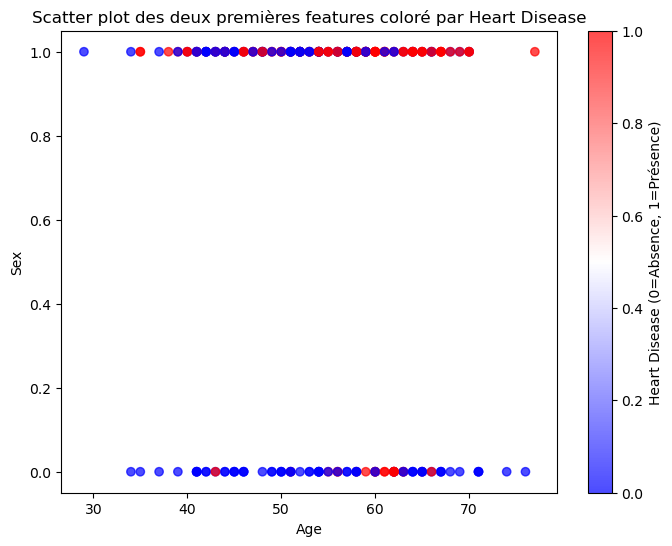

In [8]:
# Visualisation après normalisation
plt.figure(figsize=(8,6))
scatter = plt.scatter(X.iloc[:, 0], X.iloc[:, 1], c=y, cmap='bwr', alpha=0.7)
plt.xlabel(X.columns[0])
plt.ylabel(X.columns[1])
plt.title('Scatter plot des deux premières features coloré par Heart Disease')
plt.colorbar(scatter, label='Heart Disease (0=Absence, 1=Présence)')
plt.show()

In [9]:
# Validation croisée
dtc_scores = cross_val_score(DecisionTreeClassifier(), X, y, cv=5, scoring='accuracy')
print(dtc_scores)
print(dtc_scores.mean())

[0.68518519 0.68518519 0.81481481 0.72222222 0.81481481]
0.7444444444444445


In [10]:
# Essai avec Random Forest
models = [DecisionTreeClassifier(), RandomForestClassifier(), XGBClassifier()]
for model in models:
    scores = cross_val_score(model, X, y, cv=5, scoring='accuracy')
    print(model, scores.mean())

DecisionTreeClassifier() 0.7296296296296296
RandomForestClassifier() 0.8333333333333333
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...) 0.7814814814814814


Bonne accuracy.

In [11]:
# Améliorer l' exactitude en ajoutant des hyperparamètres avec l'outil `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)
grid_search.best_estimator_

,n_estimators,100
,criterion,'gini'
,max_depth,20
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [12]:
# Il recommande `max_depth=10` pour amèliorer l'accuracy
rfc = RandomForestClassifier(max_depth=10)
rfc.fit(X_train, y_train)

rfc_prediction = rfc.predict(X_test)

rfc_score = accuracy_score(y_test, rfc_prediction)
rfc_score

0.8888888888888888

La précision est inférieure à 89 %.  
Ce n'est pas mauvais.